In [1]:
import jax
import jax.numpy as jnp
from scipy.optimize import root
import matplotlib.pyplot as plt

In [2]:
def newton(f, x_0, tol=1e-5):
    f_prime = jax.grad(f)
    def q(x):
        return x - f(x) / f_prime(x)

    error = tol + 1
    x = x_0
    while error > tol:
        y = q(x)
        error = abs(x - y)
        x = y
        
    return x

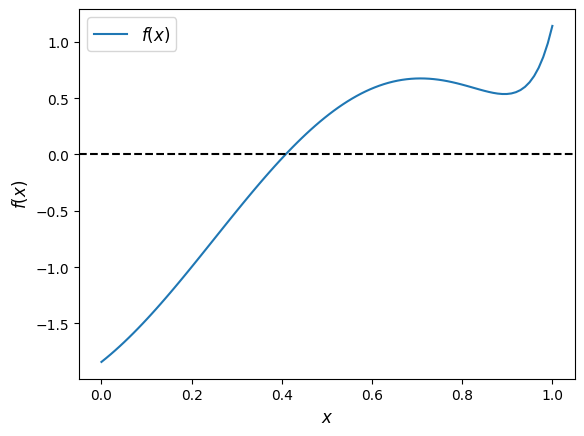

In [3]:
f = lambda x: jnp.sin(4 * (x - 1/4)) + x + x**20 - 1
x = jnp.linspace(0, 1, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='$f(x)$')
ax.axhline(ls='--', c='k')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$f(x)$', fontsize=12)
ax.legend(fontsize=12)
plt.show()

In [4]:
newton(f, 0.2)

Array(0.4082935, dtype=float32, weak_type=True)

In [5]:
def e(p, A, b, c):
    return jnp.exp(- A @ p) + c - b * jnp.sqrt(p)

In [9]:
def newton(f, x_0, tol=1e-5, max_iter=15):
    """
    A multivariate Newton root-finding routine.

    """
    x = x_0
    f_jac = jax.jacobian(f)
    @jax.jit
    def q(x):
        " Updates the current guess. "
        return x - jnp.linalg.solve(f_jac(x), f(x))
    error = tol + 1
    n = 0
    while error > tol:
        n += 1
        if(n > max_iter):
            raise Exception('Max iteration reached without convergence')
        y = q(x)
        error = jnp.linalg.norm(x - y)
        x = y
        print(f'iteration {n}, error = {error}')
    return x

In [10]:
dim = 5_000
seed = 32

# Create a random matrix A and normalize the rows to sum to one
key = jax.random.PRNGKey(seed)
A = jax.random.uniform(key, [dim, dim])
s = jnp.sum(A, axis=0)
A = A / s

# Set up b and c
b = jnp.ones(dim)
c = jnp.ones(dim)

2024-09-25 23:49:11.726517: W external/tsl/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 95.37MiB (rounded to 100000000)requested by op 
2024-09-25 23:49:11.726578: W external/tsl/tsl/framework/bfc_allocator.cc:497] *___________________________________________________________________________________________________
2024-09-25 23:49:11.726644: E external/xla/xla/pjrt/pjrt_stream_executor_client.cc:2461] Execution of replica 0 failed: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 100000000 bytes.
BufferAssignment OOM Debugging.
BufferAssignment stats:
             parameter allocation:        16B
              constant allocation:         0B
        maybe_live_out allocation:   95.37MiB
     preallocated temp allocation:  238.42MiB
  preallocated temp fragmentation:         0B (0.00%)
                 total allocation:  333.79MiB
              total fragmentation:   47.68MiB (14.29%)
Peak buffers:
	Buffer 1:
		Size: 95.37MiB
	

XlaRuntimeError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 100000000 bytes.
BufferAssignment OOM Debugging.
BufferAssignment stats:
             parameter allocation:        16B
              constant allocation:         0B
        maybe_live_out allocation:   95.37MiB
     preallocated temp allocation:  238.42MiB
  preallocated temp fragmentation:         0B (0.00%)
                 total allocation:  333.79MiB
              total fragmentation:   47.68MiB (14.29%)
Peak buffers:
	Buffer 1:
		Size: 95.37MiB
		Operator: op_name="jit(_uniform)/jit(main)/max" source_file="/tmp/ipykernel_10758/1285493232.py" source_line=6
		XLA Label: fusion
		Shape: f32[5000,5000]
		==========================

	Buffer 2:
		Size: 47.68MiB
		Operator: op_name="jit(_uniform)/jit(main)/threefry2x32" source_file="/tmp/ipykernel_10758/1285493232.py" source_line=6
		XLA Label: custom-call
		Shape: u32[12500000]
		==========================

	Buffer 3:
		Size: 47.68MiB
		Operator: op_name="jit(_uniform)/jit(main)/threefry2x32" source_file="/tmp/ipykernel_10758/1285493232.py" source_line=6
		XLA Label: custom-call
		Shape: u32[12500000]
		==========================

	Buffer 4:
		Size: 47.68MiB
		XLA Label: fusion
		Shape: u32[12500000]
		==========================

	Buffer 5:
		Size: 47.68MiB
		XLA Label: fusion
		Shape: u32[12500000]
		==========================

	Buffer 6:
		Size: 47.68MiB
		Operator: op_name="jit(_uniform)/jit(main)/threefry2x32" source_file="/tmp/ipykernel_10758/1285493232.py" source_line=6
		XLA Label: fusion
		Shape: u32[12500000]
		==========================

	Buffer 7:
		Size: 16B
		Operator: op_name="jit(_uniform)/jit(main)/threefry2x32" source_file="/tmp/ipykernel_10758/1285493232.py" source_line=6
		XLA Label: fusion
		Shape: (u32[12500000], u32[12500000])
		==========================

	Buffer 8:
		Size: 16B
		XLA Label: fusion
		Shape: (u32[12500000], u32[12500000])
		==========================

	Buffer 9:
		Size: 16B
		Operator: op_name="jit(_uniform)/jit(main)/threefry2x32" source_file="/tmp/ipykernel_10758/1285493232.py" source_line=6
		XLA Label: custom-call
		Shape: (u32[12500000], u32[12500000])
		==========================

	Buffer 10:
		Size: 8B
		Entry Parameter Subshape: u32[2]
		==========================

	Buffer 11:
		Size: 4B
		Operator: op_name="jit(_uniform)/jit(main)/broadcast_in_dim[shape=(1, 1) broadcast_dimensions=()]" source_file="/tmp/ipykernel_10758/1285493232.py" source_line=6
		Entry Parameter Subshape: f32[]
		==========================

	Buffer 12:
		Size: 4B
		Operator: op_name="jit(_uniform)/jit(main)/broadcast_in_dim[shape=(1, 1) broadcast_dimensions=()]" source_file="/tmp/ipykernel_10758/1285493232.py" source_line=6
		Entry Parameter Subshape: f32[]
		==========================



In [11]:
init_p = jnp.ones(dim)

In [12]:
%%time
p = newton(lambda p: e(p, A, b, c), init_p).block_until_ready()

NameError: name 'A' is not defined

In [13]:
%%time
p = newton(lambda p: e(p, A, b, c), init_p).block_until_ready()

NameError: name 'A' is not defined

In [14]:
%%time
p = newton(lambda p: e(p, A, b, c), init_p).block_until_ready()

NameError: name 'A' is not defined

In [15]:
jnp.max(jnp.abs(e(p, A, b, c)))

NameError: name 'p' is not defined

In [16]:
%%time
solution = root(lambda p: e(p, A, b, c),
                init_p,
                jac=lambda p: jax.jacobian(e)(p, A, b, c),
                method='hybr',
                tol=1e-5)

NameError: name 'A' is not defined

In [17]:
p = solution.x
jnp.max(jnp.abs(e(p, A, b, c)))

NameError: name 'solution' is not defined